In [1]:
import re
import csv
import os
import glob
import datetime
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import log_loss
from sklearn.ensemble import RandomForestClassifier 

In [2]:
ranks_csvs = glob.glob('./ranks/20*.csv')
ranks_csvs

['./ranks/2018.csv',
 './ranks/2016.csv',
 './ranks/2017.csv',
 './ranks/2019.csv',
 './ranks/2013.csv',
 './ranks/2008.csv',
 './ranks/2012.csv',
 './ranks/2014.csv',
 './ranks/2020.csv',
 './ranks/2006.csv',
 './ranks/2015.csv',
 './ranks/2007.csv',
 './ranks/2009.csv',
 './ranks/2010.csv',
 './ranks/2011.csv']

In [3]:
df_rank = pd.DataFrame()
for csv in ranks_csvs:
    df_rank = df_rank.append(pd.read_csv(csv))
df_rank

,Unnamed: 0,kashima-antlers,urawa-red-diamonds,yokohama-fa-marinos,kawasaki-frontale,sanfrecce-hiroshima,vegalta-sendai,kashiwa-reysol,fc-tokyo,sagan-tosu,...,omiya-ardija,avispa-fukuoka,matsumoto-yamaga,oita-trinita,jef-united,tokyo-verdy,kyoto-sanga,tokushima-vortis,yokohama-fc,montedio-yamagata
0,2018-02-23,1,1,1,1,1.0,1.0,1.0,1.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2018-02-24,3,3,3,3,3.0,3.0,3.0,3.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2018-02-25,8,4,8,8,1.0,8.0,8.0,4.0,4.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2018-02-26,6,6,6,1,2.0,2.0,14.0,6.0,6.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2018-02-27,6,6,6,1,2.0,2.0,14.0,6.0,6.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
270,2011-11-30,6,15,4,11,7.0,5.0,1.0,NaN,NaN,...,14.0,17.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18.0
271,2011-12-01,6,15,4,11,7.0,5.0,1.0,NaN,NaN,...,14.0,17.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18.0
272,2011-12-02,6,15,4,11,7.0,5.0,1.0,NaN,NaN,...,14.0,17.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18.0
273,2011-12-03,6,15,4,11,7.0,5.0,1.0,NaN,NaN,...,14.0,17.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18.0


In [4]:
df_rank = df_rank.rename(columns={"Unnamed: 0": "date"})
df_rank["date"] = pd.to_datetime(df_rank["date"])
df_rank = df_rank.set_index("date")
df_rank = df_rank.sort_index()
df_rank

,kashima-antlers,urawa-red-diamonds,yokohama-fa-marinos,kawasaki-frontale,sanfrecce-hiroshima,vegalta-sendai,kashiwa-reysol,fc-tokyo,sagan-tosu,gamba-osaka,...,omiya-ardija,avispa-fukuoka,matsumoto-yamaga,oita-trinita,jef-united,tokyo-verdy,kyoto-sanga,tokushima-vortis,yokohama-fc,montedio-yamagata
date,,,,,,,,,,,,,,,,,,,,,
2006-03-04,1,1,1,1,1.0,NaN,NaN,1.0,NaN,1.0,...,1.0,1.0,NaN,1.0,1.0,NaN,1.0,NaN,NaN,NaN
2006-03-05,3,1,3,3,3.0,NaN,NaN,3.0,NaN,1.0,...,3.0,3.0,NaN,3.0,3.0,NaN,3.0,NaN,NaN,NaN
2006-03-06,6,8,2,1,12.0,NaN,NaN,3.0,NaN,8.0,...,3.0,8.0,NaN,14.0,14.0,NaN,17.0,NaN,NaN,NaN
2006-03-07,6,8,2,1,12.0,NaN,NaN,3.0,NaN,8.0,...,3.0,8.0,NaN,14.0,14.0,NaN,17.0,NaN,NaN,NaN
2006-03-08,6,8,2,1,12.0,NaN,NaN,3.0,NaN,8.0,...,3.0,8.0,NaN,14.0,14.0,NaN,17.0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-12-16,5,10,9,1,8.0,18.0,7.0,6.0,14.0,2.0,...,NaN,NaN,NaN,11.0,NaN,NaN,NaN,NaN,15.0,NaN
2020-12-17,5,10,9,1,8.0,16.0,7.0,6.0,14.0,2.0,...,NaN,NaN,NaN,11.0,NaN,NaN,NaN,NaN,15.0,NaN
2020-12-18,5,10,9,1,8.0,16.0,7.0,6.0,14.0,2.0,...,NaN,NaN,NaN,11.0,NaN,NaN,NaN,NaN,15.0,NaN


In [5]:
gd_csvs = glob.glob('./goal_differences/20*.csv')
df_gd = pd.DataFrame()
for csv in gd_csvs:
    df_gd = df_gd.append(pd.read_csv(csv))
    
df_gd["date"] = pd.to_datetime(df_gd["date"])
df_gd = df_gd.set_index("date")
df_gd = df_gd.sort_index()
df_gd

,kashima-antlers,urawa-red-diamonds,yokohama-fa-marinos,kawasaki-frontale,sanfrecce-hiroshima,vegalta-sendai,kashiwa-reysol,fc-tokyo,sagan-tosu,gamba-osaka,...,omiya-ardija,avispa-fukuoka,matsumoto-yamaga,oita-trinita,jef-united,tokyo-verdy,kyoto-sanga,tokushima-vortis,yokohama-fc,montedio-yamagata
date,,,,,,,,,,,,,,,,,,,,,
2006-03-04,0,0,0,0,0.0,NaN,NaN,0.0,NaN,0.0,...,0.0,0.0,NaN,0.0,0.0,NaN,0.0,NaN,NaN,NaN
2006-03-05,0,0,0,0,0.0,NaN,NaN,0.0,NaN,0.0,...,0.0,0.0,NaN,0.0,0.0,NaN,0.0,NaN,NaN,NaN
2006-03-06,1,0,3,6,-1.0,NaN,NaN,2.0,NaN,0.0,...,2.0,0.0,NaN,-2.0,-2.0,NaN,-3.0,NaN,NaN,NaN
2006-03-07,1,0,3,6,-1.0,NaN,NaN,2.0,NaN,0.0,...,2.0,0.0,NaN,-2.0,-2.0,NaN,-3.0,NaN,NaN,NaN
2006-03-08,1,0,3,6,-1.0,NaN,NaN,2.0,NaN,0.0,...,2.0,0.0,NaN,-2.0,-2.0,NaN,-3.0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-12-16,11,-9,12,54,11.0,-26.0,14.0,4.0,-7.0,4.0,...,NaN,NaN,NaN,-10.0,NaN,NaN,NaN,NaN,-22.0,NaN
2020-12-17,11,-11,12,56,10.0,-25.0,15.0,4.0,-6.0,6.0,...,NaN,NaN,NaN,-9.0,NaN,NaN,NaN,NaN,-24.0,NaN
2020-12-18,11,-11,12,56,10.0,-25.0,15.0,4.0,-6.0,6.0,...,NaN,NaN,NaN,-9.0,NaN,NaN,NaN,NaN,-24.0,NaN


In [6]:
points_csvs = glob.glob('./points/20*.csv')
df_points = pd.DataFrame()
for csv in points_csvs:
    df_points = df_points.append(pd.read_csv(csv))
    
df_points["date"] = pd.to_datetime(df_points["date"])
df_points = df_points.set_index("date")
df_points = df_points.sort_index()
df_points

,kashima-antlers,urawa-red-diamonds,yokohama-fa-marinos,kawasaki-frontale,sanfrecce-hiroshima,vegalta-sendai,kashiwa-reysol,fc-tokyo,sagan-tosu,gamba-osaka,...,omiya-ardija,avispa-fukuoka,matsumoto-yamaga,oita-trinita,jef-united,tokyo-verdy,kyoto-sanga,tokushima-vortis,yokohama-fc,montedio-yamagata
date,,,,,,,,,,,,,,,,,,,,,
2006-03-04,0,0,0,0,0.0,NaN,NaN,0.0,NaN,0.0,...,0.0,0.0,NaN,0.0,0.0,NaN,0.0,NaN,NaN,NaN
2006-03-05,0,1,0,0,0.0,NaN,NaN,0.0,NaN,1.0,...,0.0,0.0,NaN,0.0,0.0,NaN,0.0,NaN,NaN,NaN
2006-03-06,3,1,3,3,0.0,NaN,NaN,3.0,NaN,1.0,...,3.0,1.0,NaN,0.0,0.0,NaN,0.0,NaN,NaN,NaN
2006-03-07,3,1,3,3,0.0,NaN,NaN,3.0,NaN,1.0,...,3.0,1.0,NaN,0.0,0.0,NaN,0.0,NaN,NaN,NaN
2006-03-08,3,1,3,3,0.0,NaN,NaN,3.0,NaN,1.0,...,3.0,1.0,NaN,0.0,0.0,NaN,0.0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-12-16,58,46,47,77,48.0,24.0,49.0,54.0,32.0,62.0,...,NaN,NaN,NaN,39.0,NaN,NaN,NaN,NaN,30.0,NaN
2020-12-17,58,46,47,80,48.0,27.0,52.0,54.0,35.0,65.0,...,NaN,NaN,NaN,42.0,NaN,NaN,NaN,NaN,30.0,NaN
2020-12-18,58,46,47,80,48.0,27.0,52.0,54.0,35.0,65.0,...,NaN,NaN,NaN,42.0,NaN,NaN,NaN,NaN,30.0,NaN


In [7]:
df_match = pd.read_csv("./match_data_yearly/all_years.csv",index_col=0)
df_match["Date"] = pd.to_datetime(df_match["Date"])
df_match

,Year,Sec,Date,Home,Away,HomeID,AwayID,HomeGF,AwayGF,W/L,Stadium,Attendances
ID,,,,,,,,,,,,
6010903,2006,1,2006-03-04,gamba-osaka,urawa-red-diamonds,9,3,1,1,0,万博,20916
6012807,2006,1,2006-03-05,ventforet-kofu,shimizu-s-pulse,28,7,0,2,2,小瀬,14277
6012231,2006,1,2006-03-05,fc-tokyo,oita-trinita,22,31,2,0,1,味スタ,22531
6011323,2006,1,2006-03-05,jubilo-iwata,avispa-fukuoka,13,23,1,1,0,静岡,28564
6010820,2006,1,2006-03-05,nagoya-grampus-eight,cerezo-osaka,8,20,3,2,1,瑞穂陸,17199
...,...,...,...,...,...,...,...,...,...,...,...,...
20340120,2020,34,2020-12-19,kashima-antlers,cerezo-osaka,1,20,1,1,0,カシマ,11251
20340810,2020,34,2020-12-19,nagoya-grampus-eight,sanfrecce-hiroshima,8,10,1,0,1,豊田ス,16825
20343331,2020,34,2020-12-19,sagan-tosu,oita-trinita,33,31,2,2,0,駅スタ,8966


In [8]:
df_points_gd_all =  pd.DataFrame(index=df_match.index, columns=["Date","Sec","HomePoints","AwayPoints","HomeRank","AwayRank","RankDiff","HomeGD","AwayGD","W/L"])
df_points_gd_all["W/L"] = df_match["W/L"]
df_points_gd_all["Sec"] = df_match["Sec"]
df_points_gd_all["Date"]=df_match["Date"] 
df_points_gd_all

,Date,Sec,HomePoints,AwayPoints,HomeRank,AwayRank,RankDiff,HomeGD,AwayGD,W/L
ID,,,,,,,,,,
6010903,2006-03-04,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
6012807,2006-03-05,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2
6012231,2006-03-05,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
6011323,2006-03-05,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
6010820,2006-03-05,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
...,...,...,...,...,...,...,...,...,...,...
20340120,2020-12-19,34,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
20340810,2020-12-19,34,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
20343331,2020-12-19,34,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0


In [9]:
for index,row in df_match.iterrows():
    
    home_points = df_points.at[row["Date"],row["Home"]]
    away_points = df_points.at[row["Date"],row["Away"]]
    df_points_gd_all.at[index,"HomePoints"] = home_points
    df_points_gd_all.at[index,"AwayPoints"] = away_points
     
    home_rank = df_rank.at[row["Date"],row["Home"]]
    away_rank = df_rank.at[row["Date"],row["Away"]]
    rank_diff = away_rank - home_rank
    
    df_points_gd_all.at[index,"HomeRank"] = home_rank
    df_points_gd_all.at[index,"AwayRank"] = away_rank
    df_points_gd_all.at[index,"RankDiff"] = rank_diff
    
    home_gd = df_gd.at[row["Date"],row["Home"]]
    away_gd = df_gd.at[row["Date"],row["Away"]]
    
    df_points_gd_all.at[index,"HomeGD"] = home_gd
    df_points_gd_all.at[index,"AwayGD"] = away_gd
    
    
    

In [10]:
df_points_gd_0614 =  df_points_gd_all[df_points_gd_all["Date"].dt.year < 2015]
df_points_gd_0614

,Date,Sec,HomePoints,AwayPoints,HomeRank,AwayRank,RankDiff,HomeGD,AwayGD,W/L
ID,,,,,,,,,,
6010903,2006-03-04,1,0,0,1,1,0,0,0,0
6012807,2006-03-05,1,0,0,3,3,0,0,0,2
6012231,2006-03-05,1,0,0,3,3,0,0,0,1
6011323,2006-03-05,1,0,0,3,3,0,0,0,0
6010820,2006-03-05,1,0,0,3,3,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...
14342205,2014-12-06,34,47,50,8,7,-1,14,8,0
14340308,2014-12-06,34,62,45,2,11,9,21,-2,2
14343609,2014-12-06,34,13,62,18,1,-17,-58,28,0


### 順位差と勝敗結果の関係性

In [11]:
cross = pd.crosstab(df_points_gd_0614['RankDiff'], df_points_gd_0614['W/L'],normalize='index')
cross

W/L,0,1,2
RankDiff,,,
-17.0,0.153846,0.230769,0.615385
-16.0,0.214286,0.357143,0.428571
-15.0,0.210526,0.157895,0.631579
-14.0,0.117647,0.235294,0.647059
-13.0,0.233333,0.300000,0.466667
-12.0,0.100000,0.416667,0.483333
-11.0,0.260870,0.275362,0.463768
-10.0,0.301587,0.238095,0.460317
-9.0,0.222222,0.422222,0.355556


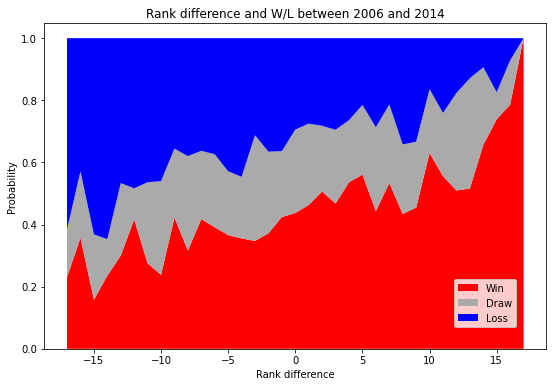

In [12]:
fig, ax = plt.subplots(figsize=(9,6))
ax.stackplot(cross.index,cross[1],cross[0],cross[2],labels=["Win","Draw","Loss"],colors=["#f00","#aaa","#00f"])
ax.legend(loc='lower right', bbox_to_anchor=(0.95, 0.05))
ax.set_xlabel("Rank difference")
ax.set_ylabel("Probability")
plt.title("Rank difference and W/L between 2006 and 2014")
plt.show()

In [13]:
df_points_gd_0614["W/L"].value_counts()

1    1201
2     902
0     651
Name: W/L, dtype: int64

In [14]:
len(df_points_gd_0614[df_points_gd_0614["W/L"] == 0]) / len(df_points_gd_0614)

0.23638344226579522

In [15]:
df_points_gd_0614["RankDiff"].value_counts().sort_index()

-17.0     13
-16.0     14
-15.0     19
-14.0     34
-13.0     30
-12.0     60
-11.0     69
-10.0     63
-9.0      90
-8.0      79
-7.0      91
-6.0     115
-5.0     112
-4.0     121
-3.0     144
-2.0     156
-1.0     132
 0.0     119
 1.0     149
 2.0     156
 3.0     139
 4.0     125
 5.0     107
 6.0     115
 7.0      75
 8.0      76
 9.0      66
 10.0     73
 11.0     54
 12.0     51
 13.0     31
 14.0     32
 15.0     23
 16.0     14
 17.0      7
Name: RankDiff, dtype: int64

In [16]:
119+149+132+156+156

712

In [17]:
712/2754

0.2585330428467683

In [18]:
df_points_gd_0614["RankDiff"].value_counts().sort_index()

-17.0     13
-16.0     14
-15.0     19
-14.0     34
-13.0     30
-12.0     60
-11.0     69
-10.0     63
-9.0      90
-8.0      79
-7.0      91
-6.0     115
-5.0     112
-4.0     121
-3.0     144
-2.0     156
-1.0     132
 0.0     119
 1.0     149
 2.0     156
 3.0     139
 4.0     125
 5.0     107
 6.0     115
 7.0      75
 8.0      76
 9.0      66
 10.0     73
 11.0     54
 12.0     51
 13.0     31
 14.0     32
 15.0     23
 16.0     14
 17.0      7
Name: RankDiff, dtype: int64

### 考察

* 順位差と勝敗の相関関係は概ねある
* 引き分けの割合はほぼどの順位差においても20~25%ぐらいある(06-14で23.6%)

順位と勝敗は相関関係があるが,絶対的なものではない


### 実際に予測してみる

In [50]:
df_points_gd_1520 = df_points_gd_all[df_points_gd_all["Date"].dt.year >= 2015]
df_points_gd_1520

,Date,Sec,HomePoints,AwayPoints,HomeRank,AwayRank,RankDiff,HomeGD,AwayGD,W/L
ID,,,,,,,,,,
15010846,2015-03-07,1,0,0,1,1,0,0,0,0
15010922,2015-03-07,1,0,0,1,1,0,0,0,0
15011028,2015-03-07,1,0,0,1,1,0,0,0,1
15013378,2015-03-07,1,0,0,1,1,0,0,0,1
15015429,2015-03-07,1,0,0,1,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...
20340120,2020-12-19,34,58,59,5,4,-1,11,9,0
20340810,2020-12-19,34,60,48,3,8,5,16,10,1
20343331,2020-12-19,34,35,42,14,11,-3,-6,-9,0


In [51]:
df_points_gd_1520["W/L"].value_counts()

1    735
2    674
0    427
Name: W/L, dtype: int64

In [52]:
df_points_gd_pred = df_points_gd_1520.assign(Prediction=np.nan)
df_points_gd_pred 

,Date,Sec,HomePoints,AwayPoints,HomeRank,AwayRank,RankDiff,HomeGD,AwayGD,W/L,Prediction
ID,,,,,,,,,,,
15010846,2015-03-07,1,0,0,1,1,0,0,0,0,NaN
15010922,2015-03-07,1,0,0,1,1,0,0,0,0,NaN
15011028,2015-03-07,1,0,0,1,1,0,0,0,1,NaN
15013378,2015-03-07,1,0,0,1,1,0,0,0,1,NaN
15015429,2015-03-07,1,0,0,1,1,0,0,0,1,NaN
...,...,...,...,...,...,...,...,...,...,...,...
20340120,2020-12-19,34,58,59,5,4,-1,11,9,0,NaN
20340810,2020-12-19,34,60,48,3,8,5,16,10,1,NaN
20343331,2020-12-19,34,35,42,14,11,-3,-6,-9,0,NaN


In [53]:
for index,row in df_points_gd_pred.iterrows():
    if row["RankDiff"] > 0:
        pred = 1
    elif row["RankDiff"] < 0:
        pred = 2
    else:
        pred = 0
    df_points_gd_pred.at[index,"Prediction"] = pred
    
df_points_gd_pred = df_points_gd_pred.astype(int)

In [54]:
df_points_gd_pred

,Date,Sec,HomePoints,AwayPoints,HomeRank,AwayRank,RankDiff,HomeGD,AwayGD,W/L,Prediction
ID,,,,,,,,,,,
15010846,1425686400000000000,1,0,0,1,1,0,0,0,0,0
15010922,1425686400000000000,1,0,0,1,1,0,0,0,0,0
15011028,1425686400000000000,1,0,0,1,1,0,0,0,1,0
15013378,1425686400000000000,1,0,0,1,1,0,0,0,1,0
15015429,1425686400000000000,1,0,0,1,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...
20340120,1608336000000000000,34,58,59,5,4,-1,11,9,0,2
20340810,1608336000000000000,34,60,48,3,8,5,16,10,1,1
20343331,1608336000000000000,34,35,42,14,11,-3,-6,-9,0,2


In [55]:
df_points_gd_pred["W/L"].value_counts()

1    735
2    674
0    427
Name: W/L, dtype: int64

In [56]:
df_points_gd_pred["Prediction"].value_counts()

2    883
1    874
0     79
Name: Prediction, dtype: int64

In [57]:
len(df_points_gd_pred[df_points_gd_pred["W/L"] == df_points_gd_pred["Prediction"]])


848

In [58]:
len(df_points_gd_pred[df_points_gd_pred["W/L"] == df_points_gd_pred["Prediction"]])/len(df_points_gd_pred)


0.46187363834422657

In [59]:
df_points_gd_pred[df_points_gd_pred["W/L"] == df_points_gd_pred["Prediction"]]["Prediction"].value_counts()


1    433
2    393
0     22
Name: Prediction, dtype: int64

In [60]:
 df_points_gd_pred[df_points_gd_pred["W/L"] == df_points_gd_pred["Prediction"]]["Sec"].value_counts().sort_index()

1     29
2     29
3     26
4     25
5     33
6     29
7     41
8     35
9     33
10    33
11    36
12    30
13    38
14    36
15    35
16    39
17    38
18    18
19    18
20    19
21    19
22    18
23    17
24    17
25    18
26    17
27     7
28    16
29    16
30    13
31    22
32    16
33    17
34    15
Name: Sec, dtype: int64

In [61]:
 df_points_gd_pred["Sec"].value_counts().sort_index()
    

1     72
2     72
3     72
4     72
5     72
6     72
7     72
8     72
9     72
10    72
11    72
12    72
13    72
14    72
15    72
16    72
17    72
18    36
19    36
20    36
21    36
22    36
23    36
24    36
25    36
26    36
27    36
28    36
29    36
30    36
31    36
32    36
33    36
34    36
Name: Sec, dtype: int64

In [62]:
accuracy_by_sec = df_points_gd_pred[df_points_gd_pred["W/L"] == df_points_gd_pred["Prediction"]]["Sec"].value_counts().sort_index() / df_points_gd_pred["Sec"].value_counts().sort_index()

In [63]:
x = accuracy_by_sec.index
y = np.poly1d(np.polyfit(accuracy_by_sec.index, accuracy_by_sec.values, 2))(accuracy_by_sec.index)

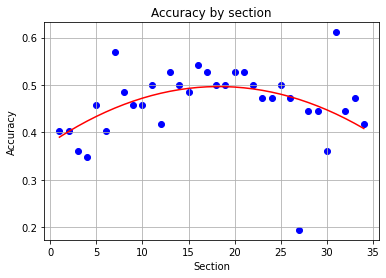

In [65]:
plt.scatter(x, accuracy_by_sec.values, c="blue", label="")
plt.plot(x, y, c="red")
plt.title("Accuracy by section")
plt.xlabel("Section")
plt.ylabel("Accuracy")
plt.grid(True)
plt.show()

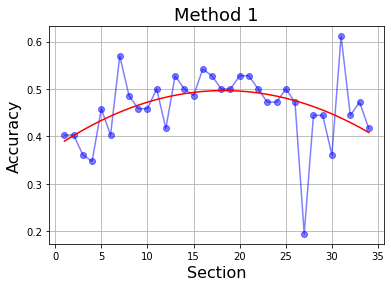

In [68]:
## 予稿用
plt.plot(x, accuracy_by_sec.values, c="blue",marker="o",alpha=0.5 )
plt.plot(x, y, c="red")
plt.title("Method 1",fontsize=18)
plt.xlabel("Section", fontsize=16)
plt.ylabel("Accuracy",fontsize=16)
plt.grid(True)
plt.show()

### 考察

* 的中率 46.2%
* 意外と他の手法と遜色ないぐらいの的中率ではある
* 開幕したての頃は順位が最適化されていないので,そこで精度落としている



### ±2位差のときは引き分けとする

±2位差の試合数--->119+149+132+156+156=712

±2位差の試合数の割合--->712/2754=0.2585330428467683

±2位差が712試合あって25.9%の試合数を占める. よって±2位差を引き分けとみなせば,引き分けの的中率が伸びて,全体の的中率が上がるかも!

In [34]:
df_points_gd_pred = df_points_gd_pred.assign(Prediction2=np.nan)
df_points_gd_pred 

,Date,Sec,HomePoints,AwayPoints,HomeRank,AwayRank,RankDiff,HomeGD,AwayGD,W/L,Prediction,Prediction2
ID,,,,,,,,,,,,
15010846,1425686400000000000,1,0,0,1,1,0,0,0,0,0,NaN
15010922,1425686400000000000,1,0,0,1,1,0,0,0,0,0,NaN
15011028,1425686400000000000,1,0,0,1,1,0,0,0,1,0,NaN
15013378,1425686400000000000,1,0,0,1,1,0,0,0,1,0,NaN
15015429,1425686400000000000,1,0,0,1,1,0,0,0,1,0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
20340120,1608336000000000000,34,58,59,5,4,-1,11,9,0,2,NaN
20340810,1608336000000000000,34,60,48,3,8,5,16,10,1,1,NaN
20343331,1608336000000000000,34,35,42,14,11,-3,-6,-9,0,2,NaN


In [35]:
for index,row in df_points_gd_pred.iterrows():
#     if row["HomePoints"] > row["AwayPoints"]:
#         pred = 1
#     elif row["HomePoints"] < row["AwayPoints"]:
#         pred = 2
#     else:
#         if row["HomeGD"] > row["AwayGD"]:
#             pred = 1
#         elif row["HomeGD"] < row["AwayGD"]:
#             pred = 2
#         else:
#             pred = 0
#     df_points_gd_pred.at[index,"Prediction"] = pred
    
    if row["RankDiff"] > 2:
        pred = 1
    elif row["RankDiff"] < -2:
        pred = 2
    else:
        pred = 0
        
    df_points_gd_pred.at[index,"Prediction2"] = pred
    
df_points_gd_pred = df_points_gd_pred.astype(int)

In [36]:
df_points_gd_pred

,Date,Sec,HomePoints,AwayPoints,HomeRank,AwayRank,RankDiff,HomeGD,AwayGD,W/L,Prediction,Prediction2
ID,,,,,,,,,,,,
15010846,1425686400000000000,1,0,0,1,1,0,0,0,0,0,0
15010922,1425686400000000000,1,0,0,1,1,0,0,0,0,0,0
15011028,1425686400000000000,1,0,0,1,1,0,0,0,1,0,0
15013378,1425686400000000000,1,0,0,1,1,0,0,0,1,0,0
15015429,1425686400000000000,1,0,0,1,1,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
20340120,1608336000000000000,34,58,59,5,4,-1,11,9,0,2,0
20340810,1608336000000000000,34,60,48,3,8,5,16,10,1,1,1
20343331,1608336000000000000,34,35,42,14,11,-3,-6,-9,0,2,2


In [37]:
df_points_gd_pred["Prediction2"].value_counts()

2    693
1    674
0    469
Name: Prediction2, dtype: int64

In [38]:
len(df_points_gd_pred[df_points_gd_pred["W/L"] == df_points_gd_pred["Prediction2"]])

772

In [39]:
len(df_points_gd_pred[df_points_gd_pred["W/L"] == df_points_gd_pred["Prediction2"]])/len(df_points_gd_pred)

0.420479302832244

In [40]:
df_points_gd_pred[df_points_gd_pred["W/L"] == df_points_gd_pred["Prediction2"]]["Prediction2"].value_counts()

1    342
2    320
0    110
Name: Prediction2, dtype: int64

In [41]:
accuracy_by_sec = df_points_gd_pred[df_points_gd_pred["W/L"] == df_points_gd_pred["Prediction2"]]["Sec"].value_counts().sort_index() / df_points_gd_pred["Sec"].value_counts().sort_index()

In [42]:
x = accuracy_by_sec.index
y = np.poly1d(np.polyfit(accuracy_by_sec.index, accuracy_by_sec.values, 2))(accuracy_by_sec.index)

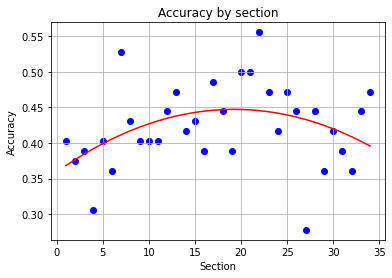

In [43]:
plt.scatter(x, accuracy_by_sec.values, c="blue", label="")
plt.plot(x, y, c="red")
plt.title("Accuracy by section")
plt.xlabel("Section")
plt.ylabel("Accuracy")
plt.grid(True)
plt.show()

### RF 予測

In [44]:
df_recent_stats = pd.read_csv("./recent_stats.csv", index_col=0)
df_recent_stats.fillna({'HomeShots':10, 'HomeShotsOnTarget':3, 'HomeShotsFromPK':0.2, 'HomePasses':400,
                        'HomeCrosses':16, 'HomeDirectFK':10, 'HomeIndirectFK':2, 'HomeCK':4,
                        'HomeThrowin':20, 'HomeDribbling':10, 'HomeTackles':18, 'HomeClearances':23,
                        'HomeIntercepts':2, 'HomeOffsides':1.5, 'HomeYellowCards':1, 'HomeRedCards':0,
                        'Home30mLineEntries':33, 'HomePenaltyAreaEntries':9, 'HomeAttacks':117,
                        'HomeChanceBuildingRate':10, 'HomePossession':44,
                        'AwayShots':10, 'AwayShotsOnTarget':3, 'AwayShotsFromPK':0.2, 'AwayPasses':400,
                        'AwayCrosses':16, 'AwayDirectFK':10, 'AwayIndirectFK':2, 'AwayCK':4,
                        'AwayThrowin':20, 'AwayDribbling':10, 'AwayTackles':18, 'AwayClearances':23,
                        'AwayIntercepts':2, 'AwayOffsides':1.5, 'AwayYellowCards':1, 'AwayRedCards':0,
                        'Away30mLineEntries':33, 'AwayPenaltyAreaEntries':9, 'AwayAttacks':117,
                        'AwayChanceBuildingRate':10, 'AwayPossession':44}, inplace=True)
df_recent_stats

,HomeShots,HomeShotsOnTarget,HomeShotsFromPK,HomePasses,HomeCrosses,HomeDirectFK,HomeIndirectFK,HomeCK,HomeThrowin,HomeDribbling,...,AwayClearances,AwayIntercepts,AwayOffsides,AwayYellowCards,AwayRedCards,Away30mLineEntries,AwayPenaltyAreaEntries,AwayAttacks,AwayChanceBuildingRate,AwayPossession
10011354,10.0,3.0,0.2,400.0,16.0,10.0,2.0,4.0,20.0,10.0,...,23.0,2.0,1.5,1.0,0.0,33.0,9.0,117.0,10.00,44.00
10011229,10.0,3.0,0.2,400.0,16.0,10.0,2.0,4.0,20.0,10.0,...,23.0,2.0,1.5,1.0,0.0,33.0,9.0,117.0,10.00,44.00
10012205,10.0,3.0,0.2,400.0,16.0,10.0,2.0,4.0,20.0,10.0,...,23.0,2.0,1.5,1.0,0.0,33.0,9.0,117.0,10.00,44.00
10011007,10.0,3.0,0.2,400.0,16.0,10.0,2.0,4.0,20.0,10.0,...,23.0,2.0,1.5,1.0,0.0,33.0,9.0,117.0,10.00,44.00
10012178,10.0,3.0,0.2,400.0,16.0,10.0,2.0,4.0,20.0,10.0,...,23.0,2.0,1.5,1.0,0.0,33.0,9.0,117.0,10.00,44.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20340120,20.0,6.8,0.0,494.8,17.8,11.8,2.0,6.8,23.4,12.2,...,24.2,1.8,1.8,0.4,0.0,34.4,13.2,113.4,11.58,45.78
20340810,12.2,4.0,0.2,537.2,11.6,14.2,1.0,3.6,21.8,14.2,...,21.8,1.8,3.0,1.0,0.2,50.4,14.2,127.2,11.30,52.58
20343331,13.0,4.4,0.0,598.6,16.2,9.6,3.2,2.6,17.8,11.4,...,22.0,3.0,1.8,1.8,0.0,37.2,9.6,115.0,8.36,55.64
20342218,9.0,4.4,0.0,379.8,8.4,13.8,1.2,3.6,18.8,11.4,...,19.4,2.4,1.2,0.8,0.0,52.4,11.2,107.8,12.16,59.62


In [45]:
df = pd.concat([df_match,df_recent_stats,df_points_gd_all[["HomeRank","AwayRank","RankDiff","HomeGD","AwayGD"]]], axis=1)
df

,Year,Sec,Date,Home,Away,HomeID,AwayID,HomeGF,AwayGF,W/L,...,Away30mLineEntries,AwayPenaltyAreaEntries,AwayAttacks,AwayChanceBuildingRate,AwayPossession,HomeRank,AwayRank,RankDiff,HomeGD,AwayGD
6010524,2006,1,2006-03-05,yokohama-fa-marinos,kyoto-sanga,5,24,4,1,1,...,NaN,NaN,NaN,NaN,NaN,3,3,0,0,0
6010820,2006,1,2006-03-05,nagoya-grampus-eight,cerezo-osaka,8,20,3,2,1,...,NaN,NaN,NaN,NaN,NaN,3,3,0,0,0
6010903,2006,1,2006-03-04,gamba-osaka,urawa-red-diamonds,9,3,1,1,0,...,NaN,NaN,NaN,NaN,NaN,1,1,0,0,0
6011001,2006,1,2006-03-05,sanfrecce-hiroshima,kashima-antlers,10,1,3,4,2,...,NaN,NaN,NaN,NaN,NaN,3,3,0,0,0
6011323,2006,1,2006-03-05,jubilo-iwata,avispa-fukuoka,13,23,1,1,0,...,NaN,NaN,NaN,NaN,NaN,3,3,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20341121,2020,34,2020-12-19,kashiwa-reysol,kawasaki-frontale,11,21,2,3,2,...,64.0,24.4,115.2,16.08,54.30,7,1,-6,15,56
20342218,2020,34,2020-12-19,fc-tokyo,vissel-kobe,22,18,1,0,1,...,52.4,11.2,107.8,12.16,59.62,6,12,6,4,-8
20343331,2020,34,2020-12-19,sagan-tosu,oita-trinita,33,31,2,2,0,...,37.2,9.6,115.0,8.36,55.64,14,11,-3,-6,-9
20343405,2020,34,2020-12-19,yokohama-fc,yokohama-fa-marinos,34,5,3,1,1,...,61.2,19.6,124.4,11.58,54.54,15,9,-6,-24,12


In [46]:
df = df.set_index("Date")
df.sort_index(inplace=True)

In [47]:
df.columns

Index(['Year', 'Sec', 'Home', 'Away', 'HomeID', 'AwayID', 'HomeGF', 'AwayGF',
       'W/L', 'Stadium', 'Attendances', 'HomeShots', 'HomeShotsOnTarget',
       'HomeShotsFromPK', 'HomePasses', 'HomeCrosses', 'HomeDirectFK',
       'HomeIndirectFK', 'HomeCK', 'HomeThrowin', 'HomeDribbling',
       'HomeTackles', 'HomeClearances', 'HomeIntercepts', 'HomeOffsides',
       'HomeYellowCards', 'HomeRedCards', 'Home30mLineEntries',
       'HomePenaltyAreaEntries', 'HomeAttacks', 'HomeChanceBuildingRate',
       'HomePossession', 'AwayShots', 'AwayShotsOnTarget', 'AwayShotsFromPK',
       'AwayPasses', 'AwayCrosses', 'AwayDirectFK', 'AwayIndirectFK', 'AwayCK',
       'AwayThrowin', 'AwayDribbling', 'AwayTackles', 'AwayClearances',
       'AwayIntercepts', 'AwayOffsides', 'AwayYellowCards', 'AwayRedCards',
       'Away30mLineEntries', 'AwayPenaltyAreaEntries', 'AwayAttacks',
       'AwayChanceBuildingRate', 'AwayPossession', 'HomeRank', 'AwayRank',
       'RankDiff', 'HomeGD', 'AwayGD'],
      d

In [48]:
df

,Year,Sec,Home,Away,HomeID,AwayID,HomeGF,AwayGF,W/L,Stadium,...,Away30mLineEntries,AwayPenaltyAreaEntries,AwayAttacks,AwayChanceBuildingRate,AwayPossession,HomeRank,AwayRank,RankDiff,HomeGD,AwayGD
Date,,,,,,,,,,,,,,,,,,,,,
2006-03-04,2006,1,gamba-osaka,urawa-red-diamonds,9,3,1,1,0,万博,...,NaN,NaN,NaN,NaN,NaN,1,1,0,0,0
2006-03-05,2006,1,yokohama-fa-marinos,kyoto-sanga,5,24,4,1,1,日産ス,...,NaN,NaN,NaN,NaN,NaN,3,3,0,0,0
2006-03-05,2006,1,nagoya-grampus-eight,cerezo-osaka,8,20,3,2,1,瑞穂陸,...,NaN,NaN,NaN,NaN,NaN,3,3,0,0,0
2006-03-05,2006,1,sanfrecce-hiroshima,kashima-antlers,10,1,3,4,2,広島ビ,...,NaN,NaN,NaN,NaN,NaN,3,3,0,0,0
2006-03-05,2006,1,jubilo-iwata,avispa-fukuoka,13,23,1,1,0,静岡,...,NaN,NaN,NaN,NaN,NaN,3,3,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-12-19,2020,34,nagoya-grampus-eight,sanfrecce-hiroshima,8,10,1,0,1,豊田ス,...,50.4,14.2,127.2,11.30,52.58,3,8,5,16,10
2020-12-19,2020,34,urawa-red-diamonds,consadole-sapporo,3,14,0,2,2,埼玉,...,46.4,13.8,123.8,11.02,53.80,10,13,3,-11,-13
2020-12-19,2020,34,kashima-antlers,cerezo-osaka,1,20,1,1,0,カシマ,...,34.4,13.2,113.4,11.58,45.78,5,4,-1,11,9


In [49]:
loglosses = []
accuracies = []
calibrations = []

for year in (2015,2016,2017,2018,2019,2020):

    df_past = pd.concat([df[f"{year-3}"],df[f"{year-2}"],df[f"{year-1}"]])
    X_train=df_past[['Sec',  'Attendances', 'HomeRate', 'AwayRate', 'HomeRD',
       'AwayRD', 'HomeShots', 'HomeShotsOnTarget', 'HomeShotsFromPK',
       'HomePasses', 'HomeCrosses', 'HomeDirectFK', 'HomeIndirectFK', 'HomeCK',
       'HomeThrowin', 'HomeDribbling', 'HomeTackles', 'HomeClearances',
       'HomeIntercepts', 'HomeOffsides', 'HomeYellowCards', 'HomeRedCards',
       'Home30mLineEntries', 'HomePenaltyAreaEntries', 'HomeAttacks',
       'HomeChanceBuildingRate', 'HomePossession', 'AwayShots',
       'AwayShotsOnTarget', 'AwayShotsFromPK', 'AwayPasses', 'AwayCrosses',
       'AwayDirectFK', 'AwayIndirectFK', 'AwayCK', 'AwayThrowin',
       'AwayDribbling', 'AwayTackles', 'AwayClearances', 'AwayIntercepts',
       'AwayOffsides', 'AwayYellowCards', 'AwayRedCards', 'Away30mLineEntries',
       'AwayPenaltyAreaEntries', 'AwayAttacks', 'AwayChanceBuildingRate',
       'AwayPossession', 'HomeRank', 'AwayRank', 'RankDiff', 'HomeGD',
       'AwayGD']].values
    y_train = df_past["W/L"].values

    df_future = df[f"{year}"]
    X_test=df_future[[ 'Sec', 'Attendances', 'HomeRate', 'AwayRate', 'HomeRD',
       'AwayRD', 'HomeShots', 'HomeShotsOnTarget', 'HomeShotsFromPK',
       'HomePasses', 'HomeCrosses', 'HomeDirectFK', 'HomeIndirectFK', 'HomeCK',
       'HomeThrowin', 'HomeDribbling', 'HomeTackles', 'HomeClearances',
       'HomeIntercepts', 'HomeOffsides', 'HomeYellowCards', 'HomeRedCards',
       'Home30mLineEntries', 'HomePenaltyAreaEntries', 'HomeAttacks',
       'HomeChanceBuildingRate', 'HomePossession', 'AwayShots',
       'AwayShotsOnTarget', 'AwayShotsFromPK', 'AwayPasses', 'AwayCrosses',
       'AwayDirectFK', 'AwayIndirectFK', 'AwayCK', 'AwayThrowin',
       'AwayDribbling', 'AwayTackles', 'AwayClearances', 'AwayIntercepts',
       'AwayOffsides', 'AwayYellowCards', 'AwayRedCards', 'Away30mLineEntries',
       'AwayPenaltyAreaEntries', 'AwayAttacks', 'AwayChanceBuildingRate',
       'AwayPossession', 'HomeRank', 'AwayRank', 'RankDiff', 'HomeGD',
       'AwayGD']].values
    y_test = df_future["W/L"].values


    rf= RandomForestClassifier(max_depth=5, random_state=1234)  
    rf.fit(X_train,y_train)
    y_pred = rf.predict(X_test)
    y_pred_proba=rf.predict_proba(X_test)

    accuracy = rf.score(X_test,y_test) 
    accuracies.append(accuracy)
    
    logloss = log_loss(y_test,y_pred_proba,labels=[0,1,2])
    loglosses.append(logloss)


    pred_winrate_sum=0 # 予測勝率の和
    actual_win_sum=0 # 実勝利数の和

    for test,pred,pred_proba in zip(y_test,y_pred,y_pred_proba):
        # ホーム優位
        if pred == 1: 
            pred_winrate_sum += pred_proba[1] 
            if test == 1: 
                actual_win_sum += 1
        # アウェイ優位
        elif pred==2: 
            pred_winrate_sum += pred_proba[2] 
            if test == 2:
                actual_win_sum += 1

    calibration = pred_winrate_sum/actual_win_sum
    calibrations.append(calibration)
    
    print(f"{year} 的中率:{accuracy:.3f}, 対数損失:{logloss:.3f}, 較正値:{calibration:.3f}")

print("======================================")    
print(f"的中率(Accuracy) : {np.mean(accuracies):.3f}" )
print(f"対数損失(Log loss) : {np.mean(loglosses):.3f}" )
print(f"較正値(Calibration ) : {np.mean(calibrations):.3f}")


KeyError: "['AwayRate', 'HomeRD', 'AwayRD', 'HomeRate'] not in index"

In [ ]:
pd.DataFrame(rf.feature_importances_,[ 'Sec', 'Attendances', 'HomeRate', 'AwayRate', 'HomeRD',
       'AwayRD', 'HomeShots', 'HomeShotsOnTarget', 'HomeShotsFromPK',
       'HomePasses', 'HomeCrosses', 'HomeDirectFK', 'HomeIndirectFK', 'HomeCK',
       'HomeThrowin', 'HomeDribbling', 'HomeTackles', 'HomeClearances',
       'HomeIntercepts', 'HomeOffsides', 'HomeYellowCards', 'HomeRedCards',
       'Home30mLineEntries', 'HomePenaltyAreaEntries', 'HomeAttacks',
       'HomeChanceBuildingRate', 'HomePossession', 'AwayShots',
       'AwayShotsOnTarget', 'AwayShotsFromPK', 'AwayPasses', 'AwayCrosses',
       'AwayDirectFK', 'AwayIndirectFK', 'AwayCK', 'AwayThrowin',
       'AwayDribbling', 'AwayTackles', 'AwayClearances', 'AwayIntercepts',
       'AwayOffsides', 'AwayYellowCards', 'AwayRedCards', 'Away30mLineEntries',
       'AwayPenaltyAreaEntries', 'AwayAttacks', 'AwayChanceBuildingRate',
       'AwayPossession', 'HomeRank', 'AwayRank', 'RankDiff', 'HomeGD',
       'AwayGD'], columns=["imp"]).sort_values("imp",ascending=False)

### 考察

順位に関しては,かなり精度向上に貢献している
RankDiffが特徴量重要度で1位になっていることから,順位差は,勝敗予測をする上で大切な特徴量と言える
